# Power Transformer | Decision Tree Classifier | Data Visualization

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/random-house-price/1553768847-housing.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


#warnings handling
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer, OneHotEncoder
from sklearn.metrics import accuracy_score, r2_score
# from sklearn.impute import KKNImputer
from sklearn.impute import KNNImputer


In [4]:
#import datasets

house= pd.read_csv('/kaggle/input/random-house-price/1553768847-housing.csv')

In [5]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [7]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
house.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14785,-117.12,32.58,34,2003,466.0,1226,443,3.0613,NEAR OCEAN,136700
1665,-122.25,38.02,16,1803,267.0,946,266,5.7001,NEAR BAY,205100
47,-122.27,37.82,43,1007,312.0,558,253,1.7348,NEAR BAY,137500
8170,-118.12,33.81,36,1665,291.0,721,294,4.6875,<1H OCEAN,250700
304,-122.18,37.77,42,1180,257.0,877,268,2.8125,NEAR BAY,97300


In [9]:
house[house.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value


In [10]:
house.isna().sum()[house.isna().sum() > 0]

total_bedrooms    207
dtype: int64

In [11]:
house.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [12]:
house['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [13]:
house['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [14]:
out_cols= house.select_dtypes(include= 'number').columns


def outlier_function(cols):
    Q1= cols.quantile(0.25)
    Q3= cols.quantile(0.75)
    
    IQR= Q3 - Q1

    lower= Q1 - 1.5*IQR
    upper= Q3 + 1.5*IQR

    return len(cols[(cols < lower) | (cols > upper)])


print("Columns          |  Outlier Count")
print('-'*40)
for cols in out_cols:
    count = outlier_function(house[cols])
    print(f"{cols:20} | {count:>10}")

Columns          |  Outlier Count
----------------------------------------
longitude            |          0
latitude             |          0
housing_median_age   |          0
total_rooms          |       1287
total_bedrooms       |       1271
population           |       1196
households           |       1220
median_income        |        681
median_house_value   |       1071


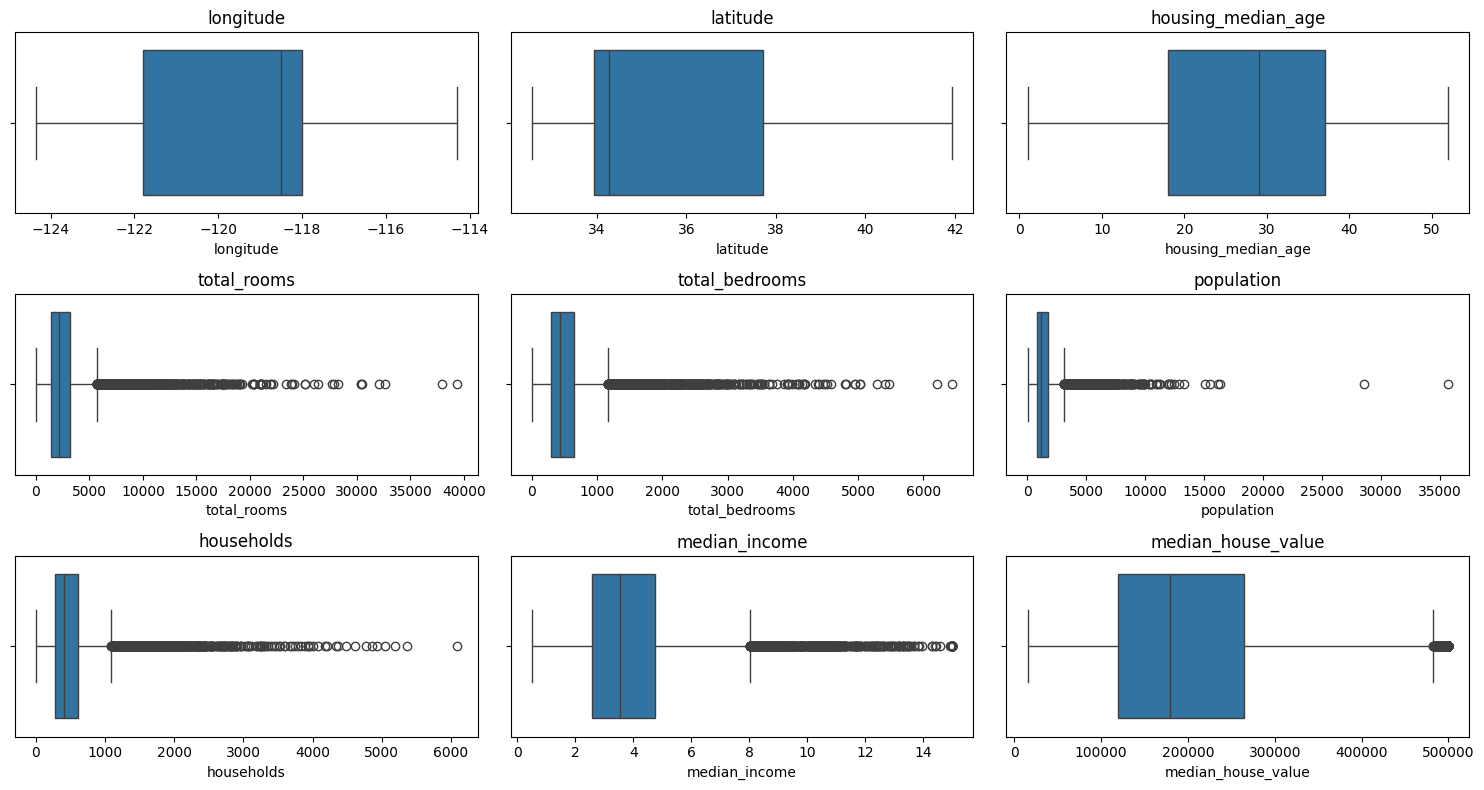

In [15]:
plt.figure(figsize=(15, 8))

for i, cols in enumerate(out_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=house[cols])
    plt.title(cols)

plt.tight_layout()
plt.show()

In [16]:
X= house.iloc[:, :-1]
y= house.iloc[:, -1]

In [17]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, random_state= 2)

In [18]:
X_train.shape

(16512, 9)

In [19]:
num_col= X_train.select_dtypes(include= 'number').columns

imputer= KNNImputer(n_neighbors=5)

X_train[num_col]= imputer.fit_transform(X_train[num_col])
X_test[num_col]= imputer.transform(X_test[num_col])

In [20]:
cat_cols = X_train.select_dtypes(include='object').columns

ohe= OneHotEncoder(handle_unknown='ignore')
X_train[cat_cols]= ohe.fit_transform(X_train[cat_cols])
X_test[cat_cols]= ohe.transform(X_test[cat_cols])

In [21]:
power= PowerTransformer()

X_train[num_col]= power.fit_transform(X_train[num_col])
X_test[num_col]= power.transform(X_test[num_col])

In [22]:
def cap_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    # cap values
    col = col.clip(lower, upper)
    return col


remove_out_cols = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

for col in remove_out_cols:
    house[col] = cap_outliers(house[col])

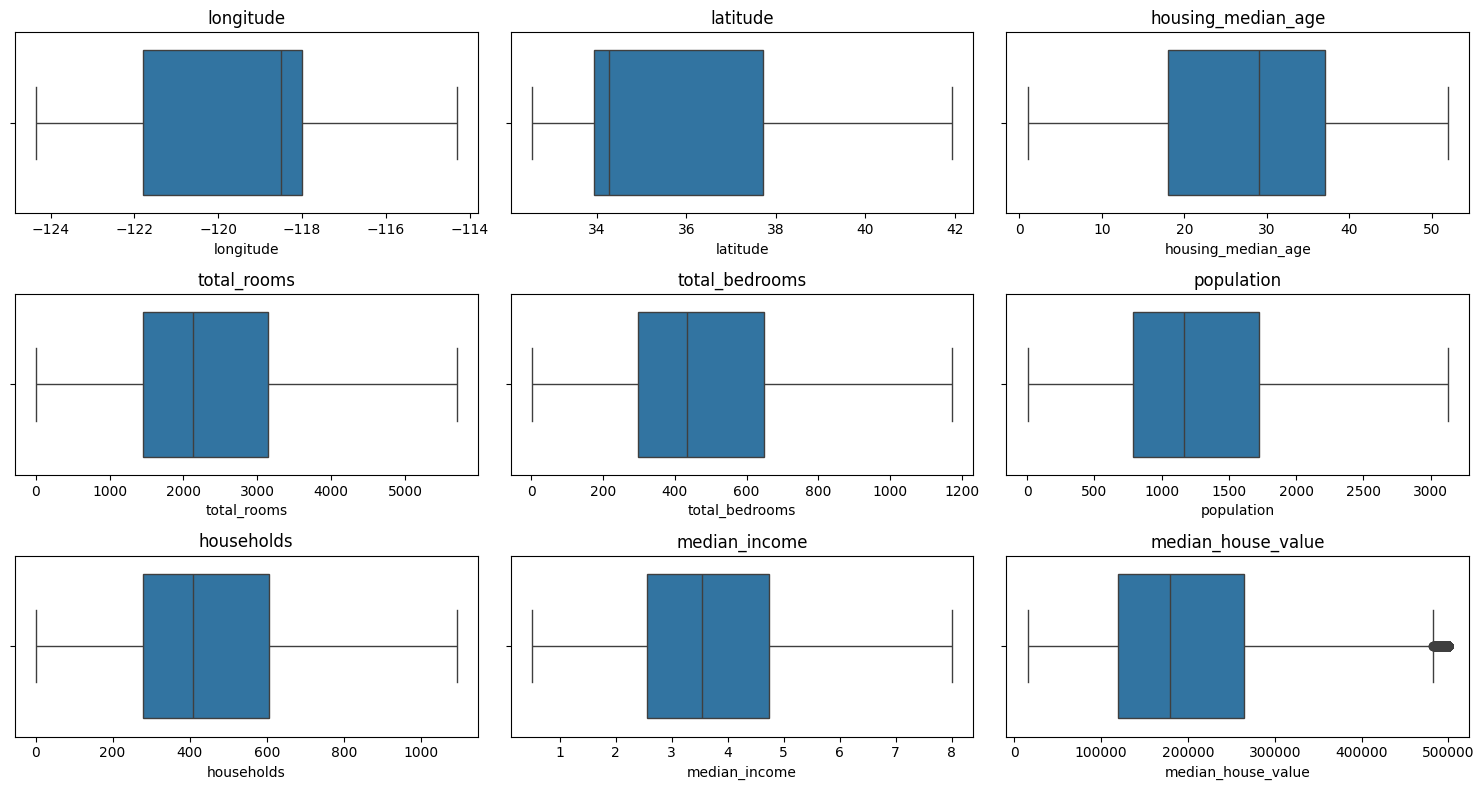

In [23]:
plt.figure(figsize=(15, 8))

for i, cols in enumerate(out_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=house[cols])
    plt.title(cols)

plt.tight_layout()
plt.show()